# Vanessa Williams
# Week 8

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

fb = pd.read_csv('fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
quakes = pd.read_csv('earthquakes.csv')
covid = pd.read_csv('covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

### Question 1: Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the mb magnitude type.

Text(0.5, 1.01, 'Correlation between earthquake magnitude\nand whether there was a tsunami')

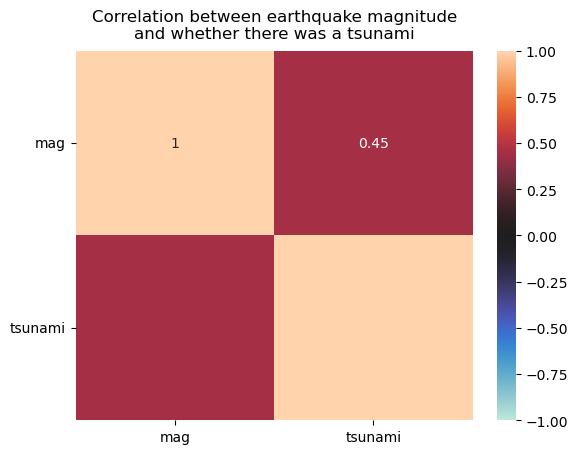

In [56]:
sns.heatmap(
    quakes.query('magType == "mb"')[['mag','tsunami']].corr(), 
    annot=True, center=0, vmin=-1, vmax=1
)
plt.yticks(rotation=0)
plt.title('Correlation between earthquake magnitude\nand whether there was a tsunami', y=1.01)

### Question 2: Create a box plot of Facebook volume traded and closing price and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5.

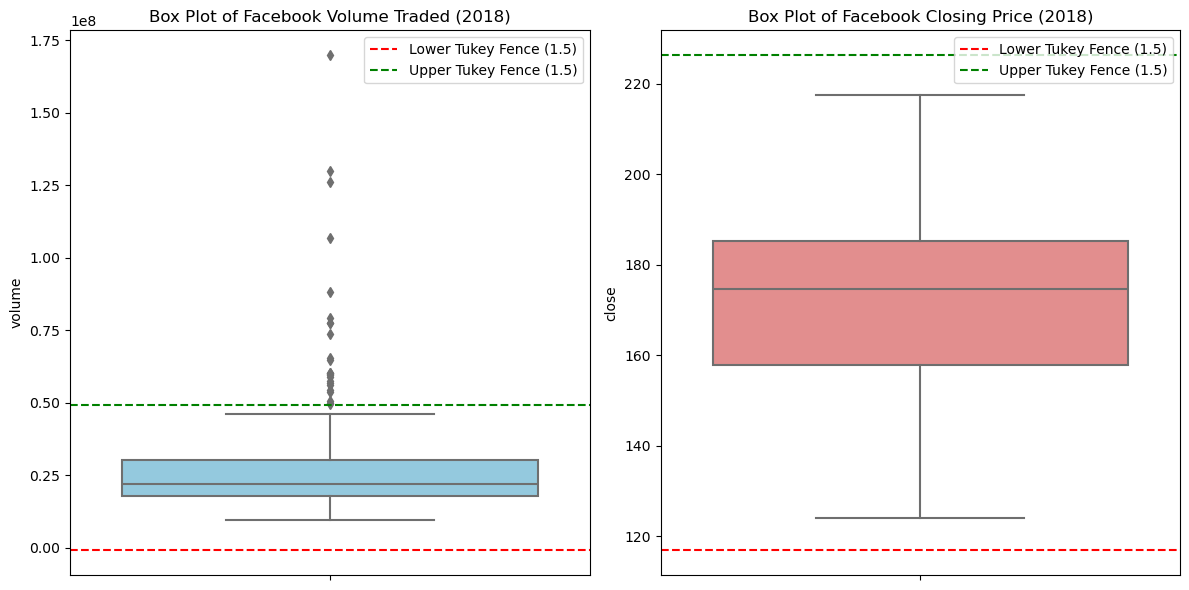

In [59]:
# Define a function to compute Tukey fence bounds
def tukey_fence(series, multiplier=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return lower_bound, upper_bound

# Calculate Tukey fence bounds for 'volume' and 'close'
volume_lower, volume_upper = tukey_fence(fb['volume'])
close_lower, close_upper = tukey_fence(fb['close'])

# Create the figure for the box plots
plt.figure(figsize=(12, 6))

# Plot boxplot for volume traded
plt.subplot(1, 2, 1)
sns.boxplot(y=fb['volume'], color='skyblue')
plt.axhline(volume_lower, color='red', linestyle='--', label='Lower Tukey Fence (1.5)')
plt.axhline(volume_upper, color='green', linestyle='--', label='Upper Tukey Fence (1.5)')
plt.title('Box Plot of Facebook Volume Traded (2018)')
plt.legend()

# Plot boxplot for closing price
plt.subplot(1, 2, 2)
sns.boxplot(y=fb['close'], color='lightcoral')
plt.axhline(close_lower, color='red', linestyle='--', label='Lower Tukey Fence (1.5)')
plt.axhline(close_upper, color='green', linestyle='--', label='Upper Tukey Fence (1.5)')
plt.title('Box Plot of Facebook Closing Price (2018)')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

### Question 3: Plot the evolution of cumulative COVID-19 cases worldwide and add a dashed vertical line for on the date that it surpassed 1 million.

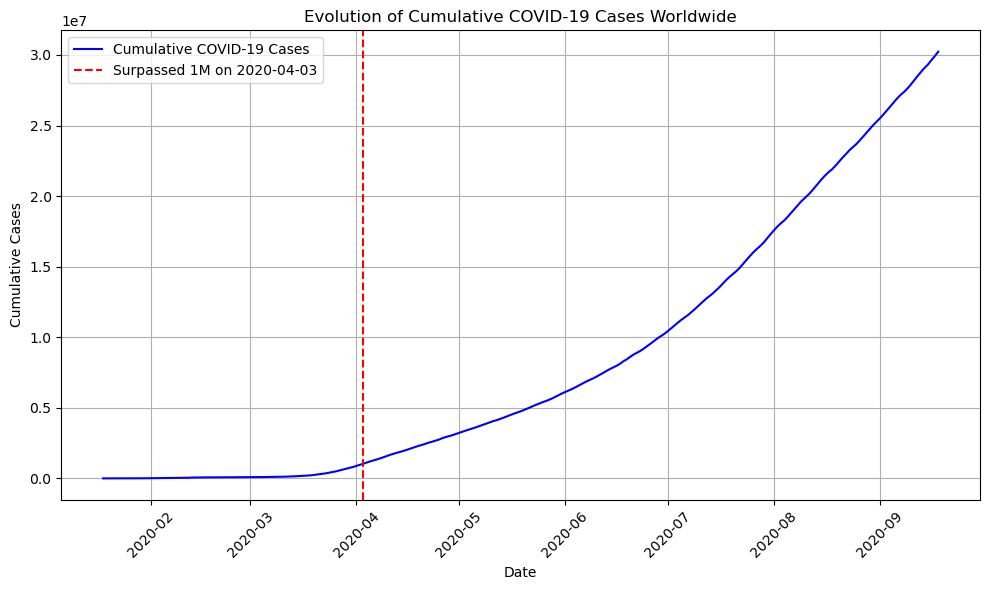

In [62]:
# Convert the dateRep column to datetime format for easier handling
covid['dateRep'] = pd.to_datetime(covid['dateRep'], format='%d/%m/%Y')

# Sort the data by date in ascending order
covid.sort_values(by='dateRep', inplace=True)

# Aggregate the cases globally by date
worldwide_cases = covid.groupby('dateRep')['cases'].sum().cumsum()

# Find the date when the cumulative cases surpassed 1 million
date_million = worldwide_cases[worldwide_cases > 1e6].index[0]

# Plot the cumulative cases over time
plt.figure(figsize=(10, 6))
plt.plot(worldwide_cases.index, worldwide_cases.values, label='Cumulative COVID-19 Cases', color='blue')

# Add a dashed vertical line when cases surpassed 1 million
plt.axvline(date_million, color='red', linestyle='--', label=f'Surpassed 1M on {date_million.date()}')

# Add labels and title
plt.title('Evolution of Cumulative COVID-19 Cases Worldwide')
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

### Question 4: Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31' marking the large decline in Facebook price on a line plot of closing price.

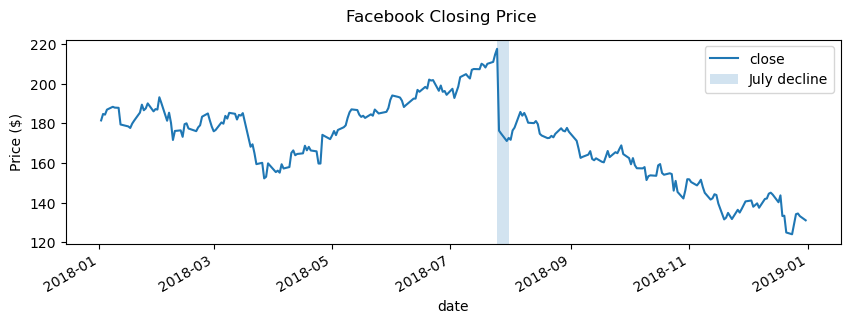

In [65]:
fb.close.plot(kind='line', figsize=(10, 3))
plt.axvspan(
    '2018-07-25', '2018-07-31', alpha=0.2, label='July decline',
)
plt.ylabel('Price ($)')
plt.suptitle('Facebook Closing Price')
plt.legend()

### Question 5:Using the Facebook stock data, annotate the following three events on a line graph of closing price:

### 'Disappointing user growth announced after close' on July 25, 2018
### 'Cambridge Analytica story breaks' on March 19, 2018 (when it affected the market)
### 'FTC launches investigation' on March 20, 2018

Text(0.5, 0.98, 'Facebook Closing Price')

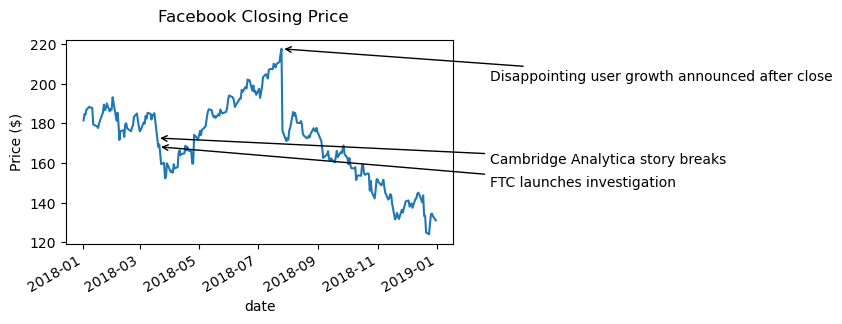

In [68]:
fb.close.plot(kind='line', figsize=(5, 3))

notes = [
    ('Disappointing user growth announced after close', '2018-07-25'),
    ('Cambridge Analytica story breaks', '2018-03-19'),
    ('FTC launches investigation', '2018-03-20')
]

# for repeatable random jitter
np.random.seed(1)

for text, date in notes:
    y_value = fb.close[date]
    jitter = np.random.uniform(-20, -10, 1)
    plt.annotate(
        text, 
        xy=(date, y_value),
        xytext=('2019-02-25', y_value + jitter),
        arrowprops=dict(arrowstyle='->')
    )
plt.ylabel('Price ($)')
plt.suptitle('Facebook Closing Price')

### Question 6: Modify the reg_resid_plot() function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, you should pick a qualitative colormap or make your own.

In [49]:
import itertools
from matplotlib import cm

def reg_resid_plots(data):
    """
    Using `seaborn`, plot the regression and residuals
    plots side-by-side for every permutation of 2 columns 
    in the data.

    Parameters:
        - data: A `pandas.DataFrame` object

    Returns:
        A matplotlib `Axes` object.
    """
    num_cols = data.shape[1]
    permutation_count = num_cols * (num_cols - 1)

    fig, ax = plt.subplots(
        permutation_count, 
        2, 
        figsize=(15, 4 * permutation_count)
    )
    for (x, y), axes, color in zip(
        itertools.permutations(data.columns, 2), 
        ax,
        [cm.Dark2(i) for i in range(len(ax))]
    ):
        for subplot, func in zip(axes, (sns.regplot, sns.residplot)):
            func(x=x, y=y, data=data, ax=subplot, color=color)
            
            if func == sns.residplot:
                # mark the residuals as such
                subplot.set_ylabel('residuals')

    return fig.axes

[<Axes: xlabel='close', ylabel='volume'>,
 <Axes: xlabel='close', ylabel='residuals'>,
 <Axes: xlabel='volume', ylabel='close'>,
 <Axes: xlabel='volume', ylabel='residuals'>]

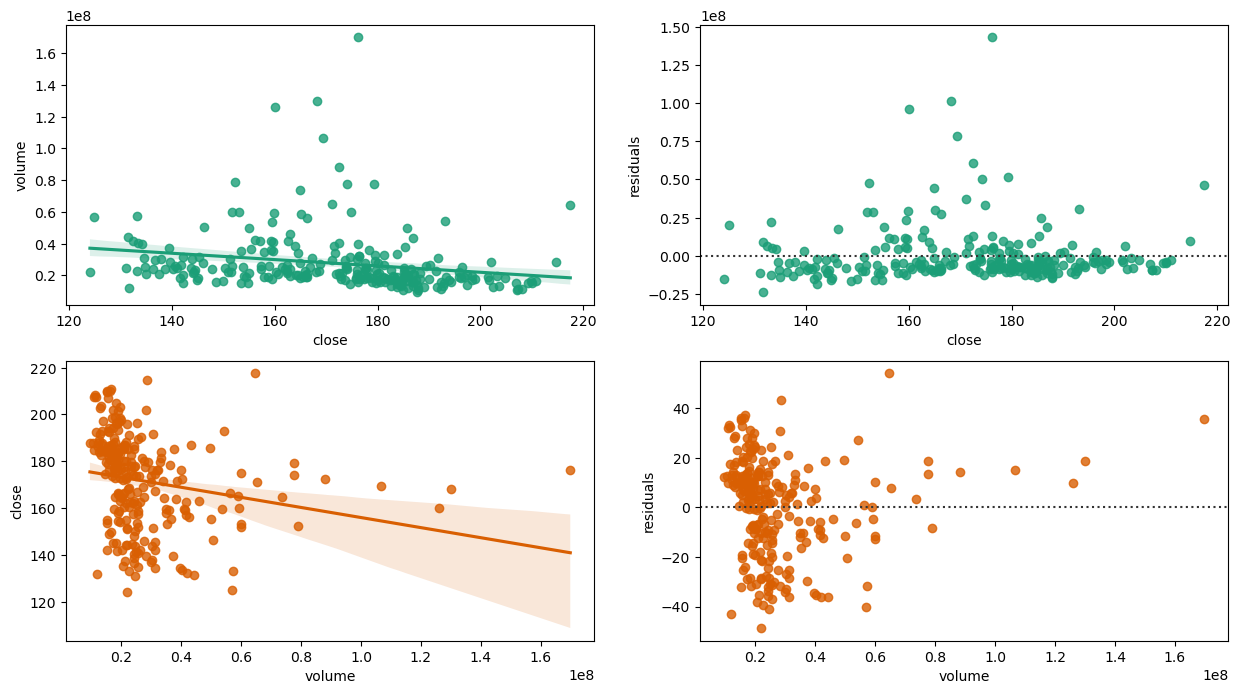

In [51]:
reg_resid_plots(fb[['close', 'volume']])

#### Title: Chapter 6 Exercise
#### Author: Stefanie Molin
#### Date: 10/16/2024
#### Modified By: Vanessa Williams
#### Description: Problems 1, 5, and 6